## This dataset comprises of information related to students’ academic and financial status, with 9 features (X). 4 of the features are binary, these are: ‘Debtor’ indicating if a student is in debt 1 or not 0, ‘Tuition fees up to date’ indicating if they paid the tuition fees 1 or not 0, ‘Gender’ presumably 1 for male and 0 for female, and ‘Scholarship holder’ indicating whether they have a scholarship 1 or not 0. The other 5 features are non-binary such as ‘age at enrollment’ and the number of ‘curricular units' approved’ in the 1st and 2nd semesters, as well as the ‘grades for the curricular units’ for both the 1st and 2nd semesters. As for the ‘Target’ (y) it indicates the student’s academic outcome ‘Dropout, Enrolled, or Graduate’.

## The dataset contains 4424 instances, these instances will be used to analyze the factors that may influence a student's academic performance and progression, in order to build multiple predictive logistic regression models and compare their performance.

# Import Necessary Libraries

In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            ConfusionMatrixDisplay, confusion_matrix)

# Calculate Performance Measures

In [2]:
# function performance to calculate and return accuracy, recall, precision and f1score
def performance(y_test, y_pred, target):
    
    #check if target is binary or multinomial
    if target == 'binary':
        average_type = 'binary'
    else:
        average_type = 'macro'  # considers all classes equally important
    
    Accuracy = accuracy_score(y_test, y_pred)
    Recall = recall_score(y_test, y_pred, average=average_type)
    Precision = precision_score(y_test, y_pred, average=average_type)
    F1Score = f1_score(y_test, y_pred, average=average_type)
    
    return {
        'Accuracy': Accuracy,
        'Recall': Recall,
        'Precision': Precision,
        'F1_Score': F1Score
    }

# Print Performance Measures

In [3]:
# Printing out the Performance Measures (Accuracy - Recall - Precision - FScore) for each fold, and the overall 
def print_performance_measures(fold_accuracies, fold_recalls, fold_precisions, fold_f1scores):
    
    # Calculate and print performance for each fold
    print("\nFold-wise Performance Measures:\n")
    numOfFolds = len(fold_accuracies)
    for i in range(numOfFolds):
        print(f"Fold {i+1}:\n Accuracy = {fold_accuracies[i]:.6f}\n Recall = {fold_recalls[i]:.6f}\n "\
              f"Precision = {fold_precisions[i]:.6f}\n F1_Score = {fold_f1scores[i]:.6f}\n")
    
    # Calculate and print overall performance
    overall_accuracy = sum(fold_accuracies) / numOfFolds
    overall_recall = sum(fold_recalls) / numOfFolds
    overall_precision = sum(fold_precisions) / numOfFolds
    overall_f1score = sum(fold_f1scores) / numOfFolds
    
    print("Overall Performance:\n")
    print(f" Accuracy = {overall_accuracy:.6f}\n Recall = {overall_recall:.6f}\n "\
          f"Precision = {overall_precision:.6f}\n F1_Score = {overall_f1score:.6f}")

# Dataset Loading

In [4]:
# Loading the dataset
academic_report_df = pd.read_csv("academic_report_dataset.csv")

# Dataset Preprocessing

In [5]:
# Extract the input feature into X and the target into y with two classes.

X = academic_report_df.drop('Target', axis=1) 

# map function replaces "Dropout" with 1 and leaves all other values filled with 0 using fillna(0)
y = academic_report_df['Target'].map({"Dropout": 1}).fillna(0)

# Dataset scaling
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
X_scaled = scaler.fit_transform(X)

# Train a Binary Logistic Regression Model

In [6]:
# Define the logistic regression model
# Changing number of iterations to 1000 to avoid failing to converge
# since default max_iter = 100
# Changing panelty to None since default penalty='l2'Regularization
BinaryModel = LogisticRegression(max_iter = 1000, penalty = None)

# Using a stratified 5-fold cross-validation
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Lists to store performance measures
fold_accuracies = []
fold_recalls = []
fold_precisions = []
fold_f1scores = []

# For each fold
# Split data, Train model, Predict binary outcome (Dropout or not), and Measure Performance
for train_index, test_index in CV.split(X_scaled, y):
    
    # Splitting data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Training the model
    BinaryModel.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = BinaryModel.predict(X_test)
    
    # Measuring performance
    perf = performance(y_test, y_pred, 'binary')
    
    # Storing performance measures for each fold
    fold_accuracies.append(perf['Accuracy'])
    fold_recalls.append(perf['Recall'])
    fold_precisions.append(perf['Precision'])
    fold_f1scores.append(perf['F1_Score'])
    
# Print the performance measures
print_performance_measures(fold_accuracies, fold_recalls, fold_precisions, fold_f1scores)


Fold-wise Performance Measures:

Fold 1:
 Accuracy = 0.857627
 Recall = 0.691228
 Precision = 0.838298
 F1_Score = 0.757692

Fold 2:
 Accuracy = 0.851977
 Recall = 0.693662
 Precision = 0.817427
 F1_Score = 0.750476

Fold 3:
 Accuracy = 0.831638
 Recall = 0.679577
 Precision = 0.768924
 F1_Score = 0.721495

Fold 4:
 Accuracy = 0.857627
 Recall = 0.686620
 Precision = 0.840517
 F1_Score = 0.755814

Fold 5:
 Accuracy = 0.855204
 Recall = 0.697183
 Precision = 0.825000
 F1_Score = 0.755725

Overall Performance:

 Accuracy = 0.850815
 Recall = 0.689654
 Precision = 0.818033
 F1_Score = 0.748241


# Train a Multinomial Logistic Regression Model

In [7]:
# Extend the dataset to handle multinomial classification.
# map function replaces "Dropout" with 0 "Enrolled" with 1 and "Graduate" with 2
y_multinomial = academic_report_df['Target'].map({
    "Dropout": 0,
    "Enrolled": 1,
    "Graduate": 2
})
# Checking that encoding is valid
print(y_multinomial.head())
# Count the occurrences of each class in the 'Target' column
class_counts = academic_report_df['Target'].value_counts()
print(class_counts)

0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]

Fold-wise Performance Measures:

Fold 1:
 Accuracy = 0.731073
 Recall = 0.607171
 Precision = 0.648558
 F1_Score = 0.599751

Fold 2:
 Accuracy = 0.729944
 Recall = 0.603308
 Precision = 0.676062
 F1_Score = 0.590463

Fold 3:
 Accuracy = 0.717514
 Recall = 0.588971
 Precision = 0.618500
 F1_Score = 0.576129

Fold 4:
 Accuracy = 0.738983
 Recall = 0.617815
 Precision = 0.703609
 F1_Score = 0.610643

Fold 5:
 Accuracy = 0.729638
 Recall = 0.603000
 Precision = 0.652880
 F1_Score = 0.593082

Overall Performance:

 Accuracy = 0.729430
 Recall = 0.604053
 Precision = 0.659922
 F1_Score = 0.594014


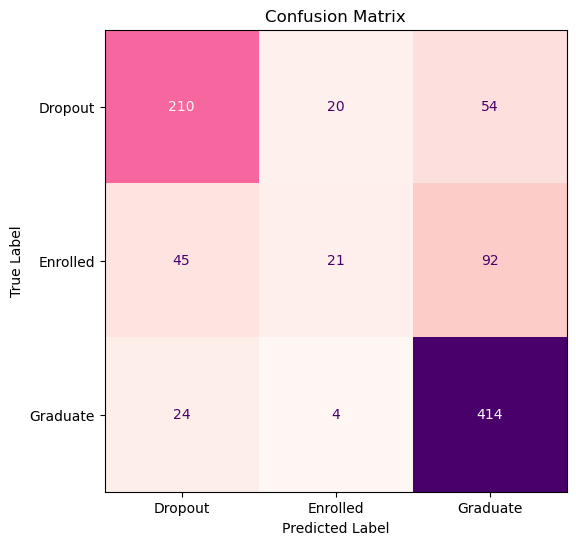

In [8]:
# Initialize the logistic regression model for multinomial classification
# Changing number of iterations to 1000 to avoid failing to converge
# since default max_iter = 100
# Changing panelty to none since default penalty='l2'Regularization
MultinomialModel = LogisticRegression(max_iter = 1000, penalty = None, multi_class='multinomial')

# Using a stratified 5-fold cross-validation
CV_multinomial = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)


# Lists to store performance measures and confusion matrices
fold_accuracies_multinomial = []
fold_recalls_multinomial = []
fold_precisions_multinomial = []
fold_f1scores_multinomial = []
confusion_matrices = []


# For each fold
# Split data, Train model, Predict three outcomes (Dropout, Enrolled, Graduate), and Measure Performance
for train_index, test_index in CV_multinomial.split(X_scaled, y_multinomial):
    
    # Splitting data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_multinomial[train_index], y_multinomial[test_index]
    
    # Training the model
    MultinomialModel.fit(X_train, y_train)
    
    # checking that model was trained on the correct encoding 
    # i.e.,"Dropout" with 0 "Enrolled" with 1 and "Graduate" with 2
    print(MultinomialModel.classes_)
    
    # Predicting on the test set
    y_pred = MultinomialModel.predict(X_test)
    
    # Measuring performance
    perf_multinomial = performance(y_test, y_pred, 'multinomial')
    
    # Storing performance measures
    fold_accuracies_multinomial.append(perf_multinomial['Accuracy'])
    fold_recalls_multinomial.append(perf_multinomial['Recall'])
    fold_precisions_multinomial.append(perf_multinomial['Precision'])
    fold_f1scores_multinomial.append(perf_multinomial['F1_Score'])
    
    # Storing confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=MultinomialModel.classes_)
    confusion_matrices.append(cm)
    

# Print the performance measures
print_performance_measures(fold_accuracies_multinomial, fold_recalls_multinomial, fold_precisions_multinomial, fold_f1scores_multinomial)

# Display a graphical Confusion Matrix 
# Graphical Confusion Matrix for the last fold
ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[-1], display_labels=["Dropout", "Enrolled", "Graduate"]).plot(cmap='RdPu', colorbar=False)
plt.gcf().set_size_inches(8, 6); 
plt.title('Confusion Matrix'); 
plt.xlabel('Predicted Label'); 
plt.ylabel('True Label')
plt.show()

# Polynomial Features

In [9]:
# Generate new features matrix consisting of all polynomial combinations of the features
poly = PolynomialFeatures(2) 
X_poly = poly.fit_transform(X_scaled)

In [10]:
# Re-define the logistic regression model for multinomial classification with polynomial features
# Changing number of iterations to 1000 to avoid failing to converge
# since default max_iter = 100
# Changing panelty to None since default penalty='l2'Regularization
PolynomialModel = LogisticRegression(max_iter = 1000, penalty = None, multi_class='multinomial')

# Using a stratified 5-fold cross-validation
CV_poly = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Lists to store performance measures with polynomial features
fold_accuracies_poly = []
fold_recalls_poly = []
fold_precisions_poly = []
fold_f1scores_poly = []


# For each fold
# Split data, Train model, Predict three outcomes (Dropout, Enrolled, Graduate), and Measure Performance
for train_index, test_index in CV_poly.split(X_poly, y_multinomial):
    
    # Splitting data
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y_multinomial.iloc[train_index], y_multinomial.iloc[test_index]
    
    # Training the model
    PolynomialModel.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = PolynomialModel.predict(X_test)
    
    # Measuring performance
    perf_poly = performance(y_test, y_pred, 'multinomial')
    
    # Storing performance measures
    fold_accuracies_poly.append(perf_poly['Accuracy'])
    fold_recalls_poly.append(perf_poly['Recall'])
    fold_precisions_poly.append(perf_poly['Precision'])
    fold_f1scores_poly.append(perf_poly['F1_Score'])
    

# Print the performance measures
print_performance_measures(fold_accuracies_poly, fold_recalls_poly, fold_precisions_poly, fold_f1scores_poly)


Fold-wise Performance Measures:

Fold 1:
 Accuracy = 0.752542
 Recall = 0.662991
 Precision = 0.693551
 F1_Score = 0.671052

Fold 2:
 Accuracy = 0.742373
 Recall = 0.650445
 Precision = 0.688117
 F1_Score = 0.659712

Fold 3:
 Accuracy = 0.733333
 Recall = 0.639043
 Precision = 0.665240
 F1_Score = 0.645949

Fold 4:
 Accuracy = 0.746893
 Recall = 0.652791
 Precision = 0.681906
 F1_Score = 0.658618

Fold 5:
 Accuracy = 0.744344
 Recall = 0.649307
 Precision = 0.674227
 F1_Score = 0.654618

Overall Performance:

 Accuracy = 0.743897
 Recall = 0.650915
 Precision = 0.680608
 F1_Score = 0.657990


# One vs. Rest Approach

In [11]:
# Re-define the logistic regression model for multinomial classification with one vs. rest approach
# Changing number of iterations to 1000 to avoid failing to converge
# since default max_iter = 100
# Changing panelty to none since default penalty='l2'Regularization
OvRModel = LogisticRegression(max_iter=1000, penalty = None, multi_class='ovr')

# Using a stratified 5-fold cross-validation
CV_ovr = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Lists to store performance measures for with one vs. rest approach
fold_accuracies_ovr = []
fold_recalls_ovr = []
fold_precisions_ovr = []
fold_f1scores_ovr = []


# For each fold
# Split data, Train model, Predict three outcomes (Dropout, Enrolled, Graduate), and Measure Performance
for train_index, test_index in CV_ovr.split(X_poly, y_multinomial):
    
    # Splitting data
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y_multinomial.iloc[train_index], y_multinomial.iloc[test_index]
    
    # Training the model
    OvRModel.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = OvRModel.predict(X_test)
    
    # Measuring performance
    perf_ovr = performance(y_test, y_pred, 'multinomial')
    
    # Storing performance measures
    fold_accuracies_ovr.append(perf_ovr['Accuracy'])
    fold_recalls_ovr.append(perf_ovr['Recall'])
    fold_precisions_ovr.append(perf_ovr['Precision'])
    fold_f1scores_ovr.append(perf_ovr['F1_Score'])

# Print the performance measures
print_performance_measures(fold_accuracies_ovr, fold_recalls_ovr, fold_precisions_ovr, fold_f1scores_ovr)


Fold-wise Performance Measures:

Fold 1:
 Accuracy = 0.755932
 Recall = 0.665258
 Precision = 0.699788
 F1_Score = 0.674146

Fold 2:
 Accuracy = 0.745763
 Recall = 0.650023
 Precision = 0.694113
 F1_Score = 0.659735

Fold 3:
 Accuracy = 0.726554
 Recall = 0.626044
 Precision = 0.653480
 F1_Score = 0.631591

Fold 4:
 Accuracy = 0.746893
 Recall = 0.650946
 Precision = 0.683098
 F1_Score = 0.656335

Fold 5:
 Accuracy = 0.744344
 Recall = 0.646176
 Precision = 0.673834
 F1_Score = 0.651355

Overall Performance:

 Accuracy = 0.743897
 Recall = 0.647690
 Precision = 0.680863
 F1_Score = 0.654632


# Regularization

In [12]:
# Initialize the logistic regression model with L2 regularization
# Changing number of iterations to 1000 to avoid failing to converge
# since default max_iter = 100
# Defalt penalty is already equal to'l2'Regularization
L2Model = LogisticRegression(max_iter=1000, multi_class='multinomial')

# Using a stratified 5-fold cross-validation
CV_l2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Lists to store performance measures for each fold with L2 regularization
fold_accuracies_l2 = []
fold_recalls_l2 = []
fold_precisions_l2 = []
fold_f1scores_l2 = []

# For each fold
# Split data, Train model, Predict three outcomes (Dropout, Enrolled, Graduate), and Measure Performance
for train_index, test_index in CV_l2.split(X_poly, y_multinomial):
    
    # Splitting data
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y_multinomial.iloc[train_index], y_multinomial.iloc[test_index]
    
    # Training the model
    L2Model.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = L2Model.predict(X_test)
    
    # Measuring performance
    perf_l2 = performance(y_test, y_pred, 'multinomial')
    
    # Storing performance measures
    fold_accuracies_l2.append(perf_l2['Accuracy'])
    fold_recalls_l2.append(perf_l2['Recall'])
    fold_precisions_l2.append(perf_l2['Precision'])
    fold_f1scores_l2.append(perf_l2['F1_Score'])

# Print the performance measures
print_performance_measures(fold_accuracies_l2, fold_recalls_l2, fold_precisions_l2, fold_f1scores_l2)


Fold-wise Performance Measures:

Fold 1:
 Accuracy = 0.754802
 Recall = 0.665843
 Precision = 0.697830
 F1_Score = 0.674437

Fold 2:
 Accuracy = 0.745763
 Recall = 0.654050
 Precision = 0.691984
 F1_Score = 0.663594

Fold 3:
 Accuracy = 0.736723
 Recall = 0.643990
 Precision = 0.670979
 F1_Score = 0.651383

Fold 4:
 Accuracy = 0.750282
 Recall = 0.656396
 Precision = 0.688195
 F1_Score = 0.662963

Fold 5:
 Accuracy = 0.744344
 Recall = 0.650243
 Precision = 0.673827
 F1_Score = 0.655625

Overall Performance:

 Accuracy = 0.746383
 Recall = 0.654104
 Precision = 0.684563
 F1_Score = 0.661600
